# Activity 06 - Performance Metrics


***
##### CS 434 - Dating Mining and Machine Learning
##### Oregon State University-Cascades
***

# Load packages

In [0]:
import ssl
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ssl._create_default_https_context = ssl._create_unverified_context

In [0]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
attributes = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d',
              'word_freq_our','word_freq_over','word_freq_remove','word_freq_internet',
              'word_freq_order','word_freq_mail','word_freq_receive','word_freq_will',
              'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free',
              'word_freq_business','word_freq_email','word_freq_you','word_freq_credit',
              'word_freq_your','word_freq_font','word_freq_000','word_freq_money',
              'word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650',
              'word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
              'word_freq_data','word_freq_415','word_freq_85','word_freq_technology',
              'word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct',
              'word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
              'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference',
              'char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$',
              'char_freq_#','capital_run_length_average','capital_run_length_longest',
              'capital_run_length_total','spam']

*** 
# Exercise #1 - Load data
*** 

##### 1.1 Load the data from the `url` and display `df`

> Data does not contains the feature names. They are listed above.

In [26]:
# load the dataset into a dataframe
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)
df.columns = attributes
print(df)

      word_freq_make  word_freq_address  ...  capital_run_length_total  spam
0               0.00               0.64  ...                       278     1
1               0.21               0.28  ...                      1028     1
2               0.06               0.00  ...                      2259     1
3               0.00               0.00  ...                       191     1
4               0.00               0.00  ...                       191     1
...              ...                ...  ...                       ...   ...
4596            0.31               0.00  ...                        88     0
4597            0.00               0.00  ...                        14     0
4598            0.30               0.00  ...                       118     0
4599            0.96               0.00  ...                        78     0
4600            0.00               0.00  ...                        40     0

[4601 rows x 58 columns]


##### 1.2 Count the number of `NaN`s

In [30]:
# count the number of NaNs
df.isnull().sum().sum()

0

> Confirm it is zero

##### 1.3 Describe `df`

In [31]:
# describe the data
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

##### 1.4 Count spam

In [38]:
# count the number of spam messages
len(df[df['spam'] == 1])

1813

##### 1.5 Count ham

In [40]:
# count the number of ham (not spam) messages
len(df[df['spam'] == 0 ])

2788

*** 
# Exercise #2 - Build a pipeline
*** 

##### 2.1 Split into features and class label

In [43]:
# split into X and y
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
print(X.shape, y.shape)

(4601, 57) (4601,)


##### 2.2 Partition into train and test

In [0]:
# split into train and test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

#####  2.3 Make a pipeline

* Standardize
* LogisticRegression
  * `random_state=1`
  * `solver='lbfgs'`

In [0]:
# pipeline with Standardization and LogisticRegression
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, solver='lbfgs'))

##### 2.4 Fit the pipeline

In [51]:
# fit the pipeline
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

###### Self-Check


```
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
```

##### 2.5 Predict and save predictions as `y_pred`

In [85]:
# predict and save precictions
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.934


*** 
# Exercise #3 - Examining error
*** 

##### 3.1 Fit, predict the probabilities, and display them

In [86]:
# predict the probabilities
prob = pipe_lr.predict_proba(X_test)
prob

array([[4.48430250e-01, 5.51569750e-01],
       [3.01133847e-03, 9.96988662e-01],
       [9.79129054e-01, 2.08709457e-02],
       ...,
       [9.99995198e-01, 4.80212255e-06],
       [8.54848458e-02, 9.14515154e-01],
       [9.88218038e-01, 1.17819621e-02]])

##### 3.2 Print the confusion matrix

In [56]:
# display a confusion matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[535  23]
 [ 38 325]]


##### 3.3 Plot the confusion matrix

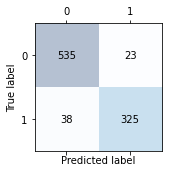

In [57]:
# graph a confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

##### 3.4 Calculate and print both accuracy and error

In [100]:
# accuracy: (tp + tn) / (p + n)
tp = confmat[0][0]
tn = confmat[1][1]
fp = confmat[0][1]
fn = confmat[1][0]
p = tp + fp
n = tn + fn
accuracy = (tp + tn) / (p + n)
error = 1 - accuracy

print("accuracy: ", accuracy, "% \t", "error: ", error, "%")
fp

accuracy:  0.9337676438653637 % 	 error:  0.0662323561346363 %


23

##### 3.5 Calculate the precision, recall, and F$_1$ score

In [101]:
# precision tp / (tp + fp)
precision = tp / (tp + fp)
recall = tp / (fn + tp)
f1 = (precision * recall)/(precision + recall)
print("precision: ", precision * 100, "%", "\trecall: ", recall * 100, "%", "\tf1: ", f1, "%")

precision:  95.87813620071685 % 	recall:  93.36823734729494 % 	f1:  0.4730327144120247 %


*** 
# Exercise #4 - Reliability and correlation
*** 

##### 4.1 Calculate the reliability Cohen's $\kappa$

In [88]:
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
kappa

0.8603098589448087

##### 4.2 Calculate Pearson's $r$

In [91]:
# Pearson correlation
corr, _ = pearsonr(y_test, y_pred)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.861


##### 4.2 Calculate correlation matrix

In [93]:
# calculate correlation matrix
coercoef = np.corrcoef(y_test, y_pred)
coercoef

array([[1.        , 0.86081786],
       [0.86081786, 1.        ]])

> A correlation matrix can be quite useful (moreso when there are more than two classes).

##### 4.4 Calculate the Spearman's $r$.

In [103]:
# Spearman correlation
spear, _ = spearmanr(y_test, y_pred)
print('Spearmans correlation: %.3f' % spear)

Spearmans correlation: 0.861


*** 
# Exercise #5 - Area under the curve
*** 

##### 5.1 Compute and plot the ROC curve

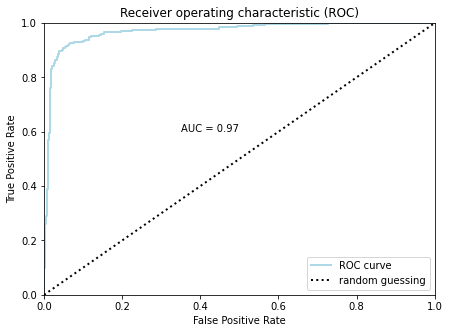

In [96]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

plt.plot(fpr, tpr, color='lightblue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='dotted', label='random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
ax.annotate('AUC = %0.2f' %roc_auc, xy=(0.35, 0.6))
plt.show()

##### 5.2 Calculate the AU-ROC

In [97]:
# calculate the roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %.3f' % auc)

ROC AUC: 0.927


##### 5.3 Calculate the AU-PRC

Calculate the area under the precision-recall curve using [average_precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score).

In [98]:
# calculate the average precision score
prc = average_precision_score(y_test, y_pred)
prc

0.8774030678776782

##### <img src="https://66.media.tumblr.com/dded9d1a2bf2068f92af9f7a9b6b5451/tumblr_p6s3hbPzgV1vd8jsjo1_500.gifv" width="300">